This can be for working on the project together to make the tree

In [35]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt



E_coli Confusion Matrix: 
[[8 5]
 [4 3]]
E_coli Accuracy: 0.55


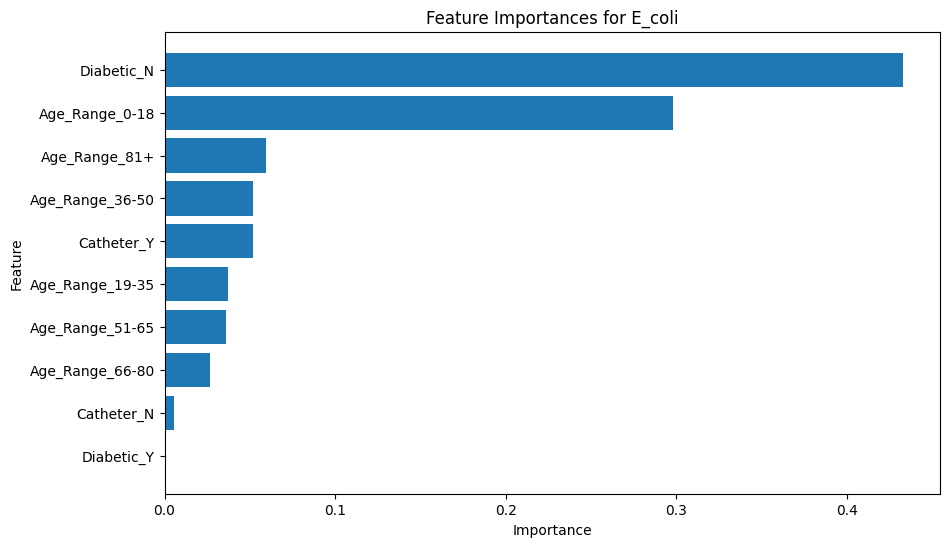

K_pneumoniae Confusion Matrix: 
[[11  3]
 [ 3  3]]
K_pneumoniae Accuracy: 0.7


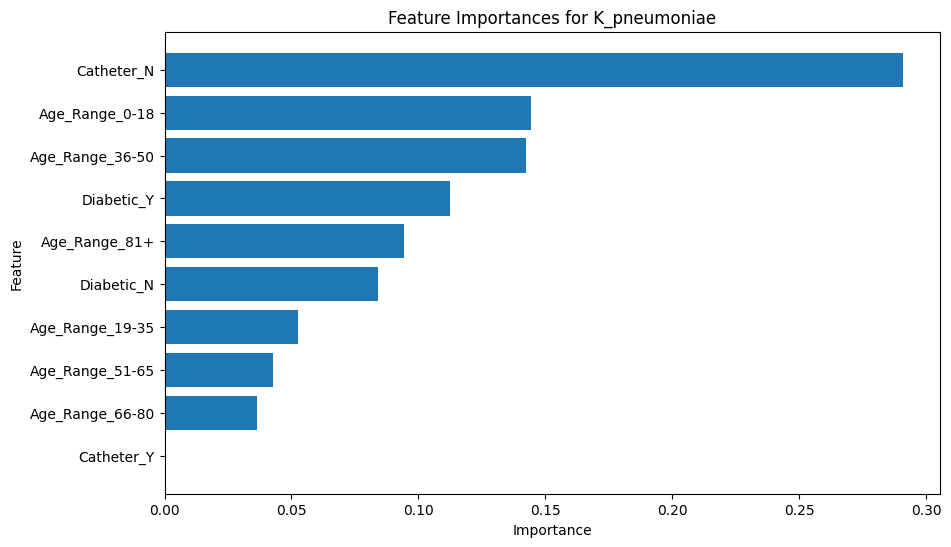

P_mirabilis Confusion Matrix: 
[[2 7]
 [6 5]]
P_mirabilis Accuracy: 0.35


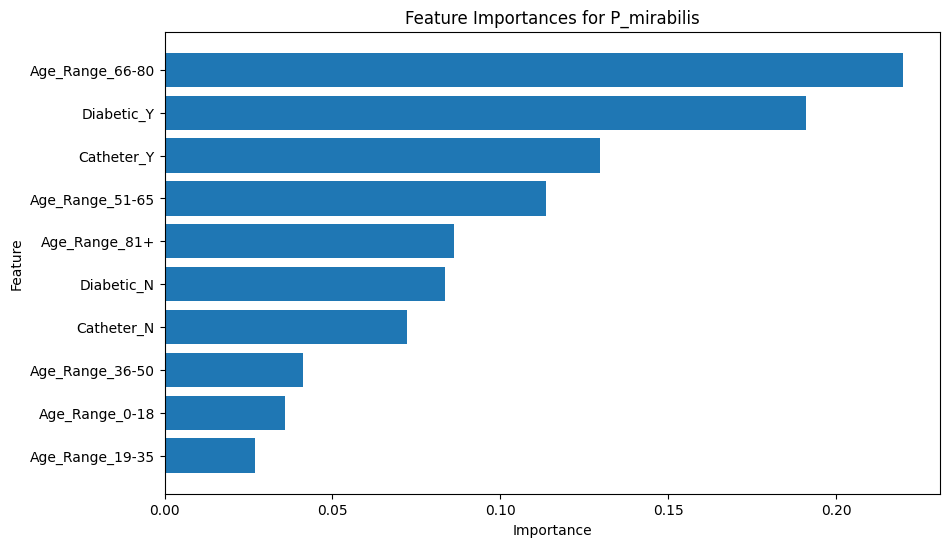

E_faecalis Confusion Matrix: 
[[6 6]
 [6 2]]
E_faecalis Accuracy: 0.4


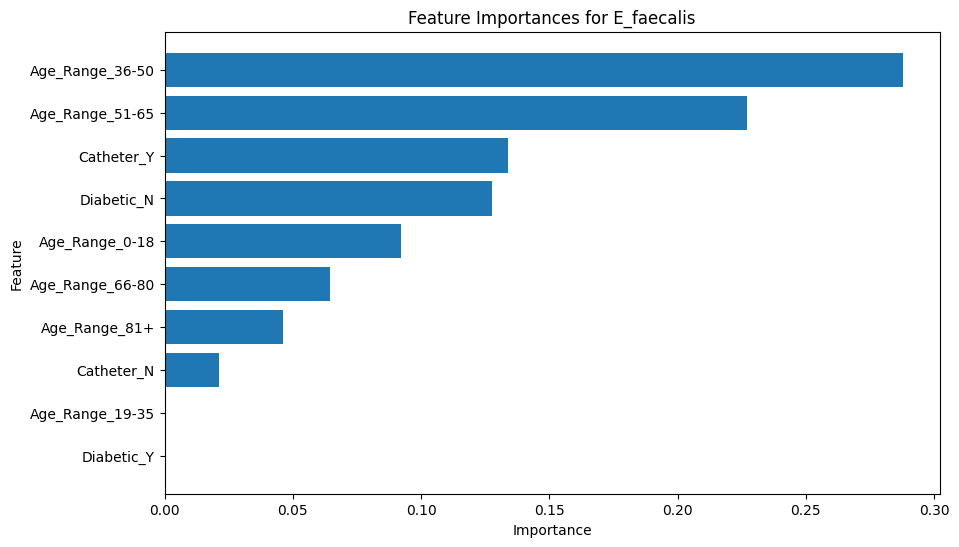

S_saprophyticus Confusion Matrix: 
[[2 8]
 [6 4]]
S_saprophyticus Accuracy: 0.3


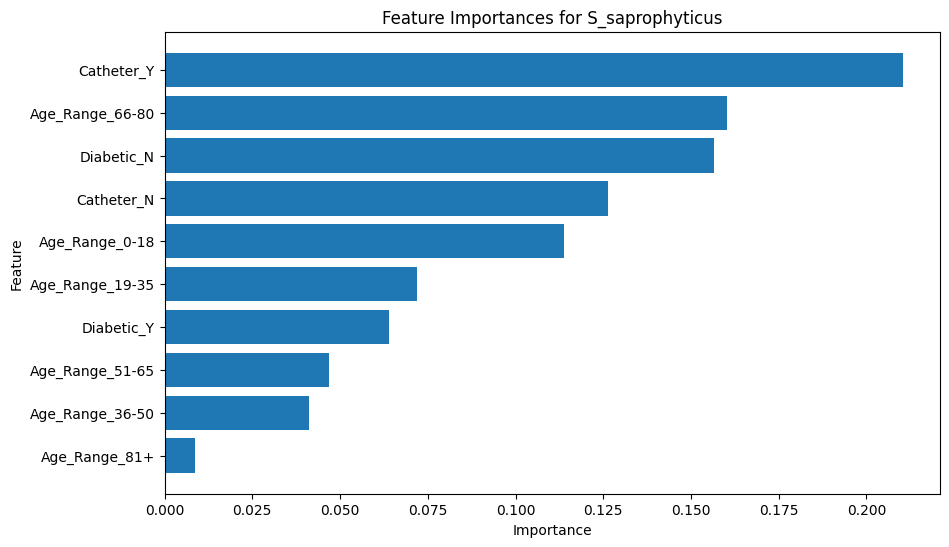

P_aeruginosa Confusion Matrix: 
[[7 2]
 [7 4]]
P_aeruginosa Accuracy: 0.55


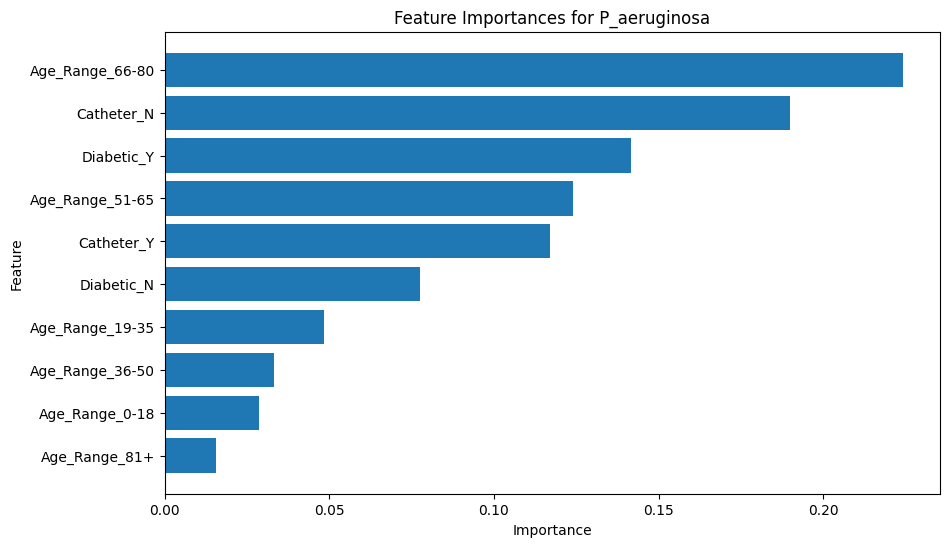

C_albicans Confusion Matrix: 
[[7 4]
 [4 5]]
C_albicans Accuracy: 0.6


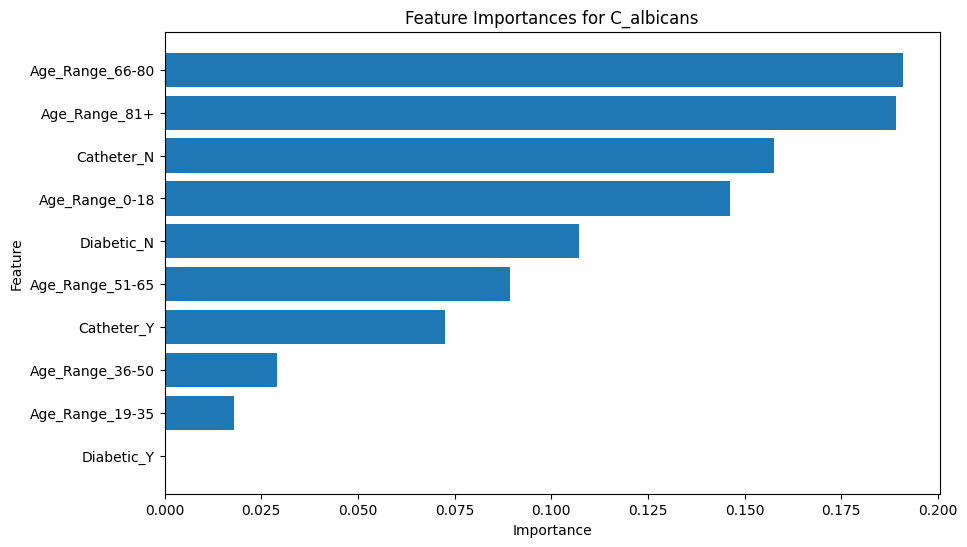

In [47]:
# need csv file to run anything
data = pd.read_csv("fake_patient_data.csv")
pathogens = ['E_coli', 'K_pneumoniae', 'P_mirabilis', 'E_faecalis', 'S_saprophyticus', 'P_aeruginosa', 'C_albicans']
X = data.drop(columns=pathogens)
for pathogen in pathogens:
    y = data[pathogen]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    DecisionTreeClassifier())
    model = pipeline.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(pathogen + f" Confusion Matrix: \n{conf_matrix}")
    print(pathogen + f" Accuracy: {accuracy}")


    feature_importances = model.named_steps['decisiontreeclassifier'].feature_importances_
    feature_names = model.named_steps['onehotencoder'].get_feature_names_out(X_train.columns)
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for {pathogen}')
    plt.gca().invert_yaxis()
    plt.show()